# Credit Card Payoff

Credit cards may set a minimum monthly payment - or floor - but paying the minimum each month does not guarantee that you are going to go debt free anytime soon, so how much should you pay in a monthly basis in order to payoff your credit card after $n$ months?

Let's approach this question from two angles: 

1. Pure mathematical, using geometric series.
2. Computing, using a popular sorting algorithm known as bisection search.  

## Mathematical approach

let $i$ be the annual interest rate divided by 12 (monthly interest rate)

let $a$ = $i+1$

let $b_0$ be the initial balance

let $n$ be the number of months

let $p$ be the constant monthly payments

let $b_n$ be the balance after $n$ months

Thus, the balance at month $n$ is given by:

$$b_n=(b_{n-1}-p).a$$

Balance after 1 month:
$$b_1=(b_0-p).a$$
$$b_1=b_0.a-p.a$$

Balance after 2 months:
$$b_2=(b_0.a-p.a-p).a$$
$$b_2=b_0.a^2-p.a^2-p.a$$

Balance after three months:
$$b_3=(b_0.a^2-p.a^2-p.a-p).a$$
$$b_3=b_0.a^3-p.a^3-p.a^2-p.a$$

Therefore, the balance after $n$ months shall be given by:

$$b_n=b_0.a^n - p.(a+a^2+a^3+...+a^n)$$

Now, the expression that multiplies $p$ is a geometric series whose value can be obtained as follows:


$$A=a+a^2+a^3+...+a^n$$
$$a.A=a^2+a^3+...+a^{n+1}$$
$$a.A-A=a^{n+1}-a$$
$$A.(a-1)=a^{n+1}-a$$
$$A=\frac{a^{n+1}-a}{a-1}$$

If we insert the previous output into our equation, we obtain:
$$b_n=b_0.a^n - p.\left(\frac{a^{n+1}-a}{a-1}\right)$$

Since we aim to payoff our credit card in $n$ months, the balance at month $n$ must be zero, so let $b_n=0$ and solve for $p$ as follows:

---
$$p=\frac{a^{n-1}.(a-1).b_0}{a^n-1}$$
---

The equation we have just derived answers our original question, which, translated into Python, looks like the function defined below.

In [1]:

def payoff_mathematical(n,b,i):
    '''
    Monthly payment to payoff a credit card in a given number of months,
    using geometric series.
    
    n: number of months
    b: initial balance
    i: annual interest rate as decimal
    
    Returns: monthly payment (p)
    '''
    a=1+(i/12) 
    p=(b*(a-1)*(a**(n-1)))/(a**n-1)  
    return round(p,2)


## Computing approach

Another way to solve our question is to try with many _monthly payments_ until we find an optimal solution, as in, start with a monthly payment of zero and keep adding 1 until our balance after $n$ months is (close to) zero. This approach, called linear search, is, as you might figure out, not very efficient. Fortunately though, there is a much more efficient alternative for finding the solution and it is called bisection search. 

What bisection search is going to do is: 
1. Create a limited, ordered set of possible monthly payments.
2. Pick the $min$ and $max$ values and find a middle point ($\frac{min+max}{2}$).
3. Let $min=\frac{b}{n}$ and $max=b$, as in, the min would be an scenario in which $i=0$ and the max an scenario in which you are forced to pay your whole balance in one month. 
4. Set the monthly payment, $p$, equal to that middle point.
5. Calculate the balance after $n$ months with given monthly payment, $p$.
6. If balance is still positive, set $min$ to current monthly payment, $p$.
7. If balance is negative, set $max$ to current monthly payment, $p$. 
8. Find the new middle point and set the new monthly payment to this value.
9. If the new monthly payment is equal to the previous monthly payment, we have found our solution and, although balance may not be equal to zero, it is going to be very close to it and any divergences will be due to decimal figures.
10. If the aforementioned condition is not met, repeat the process.

This approach is much more effective than linear search and, as shown in the plot below, we are likely to find the solution doing less iterations.



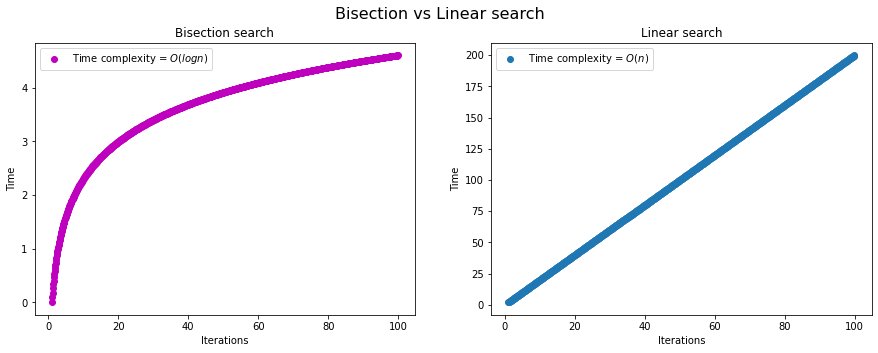

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.arange(1,100,0.1)
y1 = np.log(x)
y2 = 2*x
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(x, y1, "om",label=r"Time complexity = $O(log n)$")
ax1.set_ylabel("Time")
ax1.set_xlabel("Iterations")
ax1.set_title("Bisection search")
ax2.plot(x, y2, "o",label=r"Time complexity = $O(n)$")
ax2.set_title("Linear search")
ax2.set_ylabel("Time")
ax2.set_xlabel("Iterations")
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
fig.suptitle("Bisection vs Linear search",fontsize=16)
# plt.savefig("plot.png")
plt.show()

Bisection search sounds fine so far but there is a trick: a **limited**, ordered set of possible solutions is required, but we are dealing with real numbers and thus, infinity. So, in order to work out this problem, we are going to limit our solutions to two decimal places and now we are (almost) good to go.

One more thing to consider is that, even though we are working with numbers with two decimal figures, we are not likely to wind up with a final balance exatly equal to zero, but rather with a number like -0.023 or 0.014. This is precicesly why we check if the newly calculated monthly payment is equal to the previous one. If it is, then we have, indeed, found our answer.

Translating these steps into Python, we obtain the following function:

In [5]:
def payoff_programming(n,b,i):
  '''
  Calculates the monthly payment to payfoff a credit card 
  in a given number of months using bisection search.

  n: number of months
  b: initial balance
  i: annual interest rate as decimal
  
  Returns: monthly payment (p)
  '''
  original_b=b
  min=original_b/n
  max=original_b
  p=round(((max+min)/2),2)
  while True:
    previous_p=p
    for month in range(n):
      b=(b-p)*(1+(i/12))
      b=(round(b,2))
    if b>0:
      min=p
    elif b<0:
      max=p
    p=round(((max+min)/2),2)
    
    if p==previous_p:
      return p
    b=original_b 

Finally, we proceed to calculate our answers for $n=24$, $i=0.2$ and $b=5000$, making use of our two approaches.

In [6]:
n=24
balance=5000
annualInterestRate=0.2

print(f"Mathematical approach: you must pay \033[1m{payoff_mathematical(n,balance,annualInterestRate)} USD\033[0m on a monthly basis in order to payoff your credit card in {n} months")
print("="*50)
print(f"Programming approach: you must pay \033[1m{payoff_programming(n,balance,annualInterestRate)} USD\033[0m on a monthly basis in order to payoff your credit card in {n} months")

Mathematical approach: you must pay 250.31 USD on a monthly basis in order to payoff your credit card in 24 months
Programming approach: you must pay 250.31 USD on a monthly basis in order to payoff your credit card in 24 months


_Et voilà_, our mathematical and programming approaches yielded the same result.